<a href="https://colab.research.google.com/github/merttezcan/ML-Homeworks/blob/main/linear_regression_without_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv('boston_house_prices-rev.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVx1000USD
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#normalization
data = (data - data.mean()) / data.std()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVx1000USD
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [ ]:
X = data.iloc[:,0:13]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = data.iloc[:,13:14].values
theta = np.zeros([1,14])

alpha = 0.01
num_iter = 1000

In [ ]:
#cost means MSE here
def computeCost(X,y,theta):
  tobesummed = ((X @ theta.T)-y)**2
  return np.sum(tobesummed)/(2 * len(X))

Theta values:  [[-1.48857650e-15 -8.49715420e-02  8.83016702e-02 -2.97754563e-02
   8.08272991e-02 -1.71481808e-01  3.14546960e-01 -1.12883903e-02
  -2.98327906e-01  1.58703006e-01 -9.59722395e-02 -2.12440782e-01
   9.49431049e-02 -3.96433320e-01]]
The final cost (MSE) is:  0.13102184197075575


Text(0.5, 1.0, 'Error vs. Training Epoch')

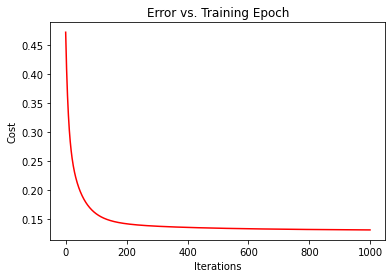

In [ ]:
def gradientDescent(X,y,theta,num_iter,alpha):
  cost = np.zeros(num_iter)
  for i in range(num_iter):
    theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
    cost[i] = computeCost(X, y, theta)
    
  return theta,cost

g,cost = gradientDescent(X,y,theta,num_iter,alpha)
print("Theta values: ", g)

finalCost = computeCost(X,y,g)
print("The final cost (MSE) is: ", finalCost)

fig, ax = plt.subplots()  
ax.plot(np.arange(num_iter), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  